## Log Return

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Ticker
ticker = "AAPL"

# --- 1. Load Historical Data  ---
# This code for run in Google Colab
EXCEL_URL = f"https://raw.githubusercontent.com/tranmaithang/tuhocquantfinance/master/assets/files/market_data/{ticker}.csv"

try:
    # Read Csv file from a public URL
    print("Loading data from public URL...")
    df = pd.read_csv(EXCEL_URL)
    # Ensure Date is datetime if loading from CSV
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    print("Success!")
except Exception as e:
    print(f"Error loading file: {e}")

Loading data from public URL...
Success!


In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import os

# --- CONFIGURATION ---
ticker = "AAPL"
folder_name = "market_data"

# --- 1. Load Historical Data ---
# This code for run in local
file_path = os.path.join(folder_name, f"{ticker}.csv")

try:
    # Read Csv file from a local
    print("Loading data from local CSV...")
    df = pd.read_csv(file_path)
    # Ensure Date is datetime if loading from CSV
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    print("Success!")
except Exception as e:
    print(f"Error loading file: {e}")

Loading data from local CSV...
Success!


In [9]:
# Inspect data
df

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,182.160,184.26,180.934,183.63,65603041.0,182.8825,2024-01-16 05:00:00,767284,NaN
1,181.270,182.93,180.300,182.68,47317433.0,181.9201,2024-01-17 05:00:00,594632,NaN
2,186.090,189.14,185.830,188.63,78005754.0,187.9375,2024-01-18 05:00:00,787235,NaN
3,189.330,191.95,188.820,191.56,68902985.0,190.6151,2024-01-19 05:00:00,682664,NaN
4,192.300,195.33,192.260,193.89,60133852.0,193.9891,2024-01-22 05:00:00,718108,NaN
...,...,...,...,...,...,...,...,...,...
497,257.020,259.29,255.700,259.04,50419337.0,257.4496,2026-01-08 05:00:00,764090,NaN
498,259.075,260.21,256.220,259.37,39996967.0,258.6804,2026-01-09 05:00:00,649745,NaN
499,259.160,261.30,256.800,260.25,45263767.0,260.0061,2026-01-12 05:00:00,664531,NaN
500,258.720,261.81,258.390,261.05,45601262.0,260.3489,2026-01-13 05:00:00,599894,NaN


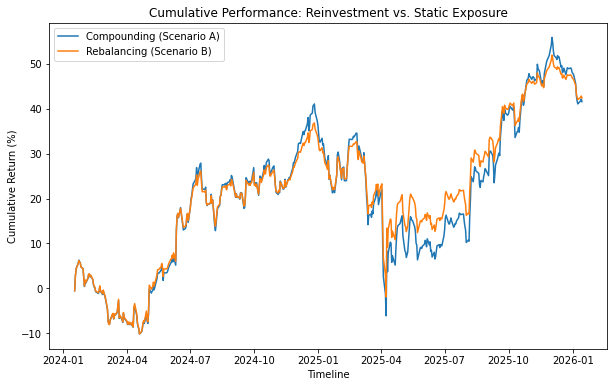

In [10]:
# --- 2. Calculate Daily Return and Cumulative Return ---
daily_returns = df['close'].pct_change().dropna()

comp_ret = (1 + daily_returns).cumprod() - 1
rebal_ret = daily_returns.cumsum()
dates = df['timestamp'].iloc[1:]

# 3. Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, comp_ret * 100, label='Compounding (Scenario A)')
plt.plot(dates, rebal_ret * 100, label='Rebalancing (Scenario B)')
plt.title('Cumulative Performance: Reinvestment vs. Static Exposure')
plt.ylabel('Cumulative Return (%)')
plt.xlabel('Timeline')
plt.legend()
plt.show()

In [29]:
# cumulative prod
(1 + daily_returns).prod() - 1

0.41567282034525976

In [28]:
# log(price last) - log(price first)
np.exp(np.log(df['close'].iloc[-1]) - np.log(df['close'].iloc[0])) - 1

0.41567282034525976